In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [13]:
%matplotlib inline

In [5]:
dfMorts = pd.read_html('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
dfCases = pd.read_html('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
dfMort = dfMorts[0]
dfCase = dfCases[0]
dfList = [dfMort, dfCase]
#print(dfMort.head(), dfCase.head())
#print(dfMort.columns, dfCase.columns)

In [6]:
#df = pd.read_csv('C:\\Users\\vroum\\Documents\\Dossier_Quentin\\BigData-Machine Learning\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_19-covid-Deaths.csv', sep=',')
dfListTreat = []
for df in dfList:
    df.drop(['Unnamed: 0', 'Province/State', 'Lat', 'Long'], axis=1, inplace = True)
    df = df.groupby(['Country/Region']).sum()
    df = df.T
    df = df.reset_index()
    df = df.rename(columns={'index': 'date'})
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df = df.iloc[24:]
    dfListTreat.append(df)
    #print(df.head())
    #for c in df.columns:
        #print(c)

dfMort = dfListTreat[0]
dfCase = dfListTreat[1]

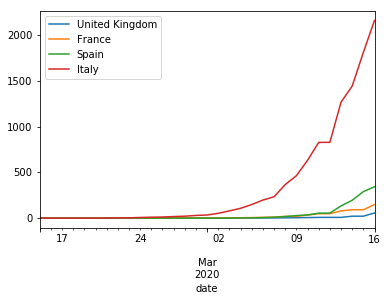

In [14]:
dfMort['United Kingdom'].plot()
dfMort['France'].plot()
dfMort['Spain'].plot()
dfMort['Italy'].plot()
plt.legend()
plt.show()

In [30]:
def f(x,y,z):
    countryRef = z
    countryShift = y
    dfShift1 = dfMort[countryShift]
    dfRef1 = dfMort[countryRef]
    dfShift1 = dfShift1.reset_index()
    dfShift1['date'] = dfShift1['date'] + pd.Timedelta(str(x)+' day')
    dfShift1 = dfShift1.set_index('date')
    dfShift2 = dfCase[countryShift]
    dfRef2 = dfCase[countryRef]
    dfShift2 = dfShift2.reset_index()
    dfShift2['date'] = dfShift2['date'] + pd.Timedelta(str(x)+' day')
    dfShift2 = dfShift2.set_index('date')
    #print(dfF.head())
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.plot(dfShift1, label=countryShift)
    plt.plot(dfRef1, label=countryRef)
    #print(dfShift1.columns)
    #dfShift1.plot()
    #dfRef1.plot()
    plt.yscale('log')
    plt.ylabel('Deaths')
    plt.legend()
    plt.subplot(212)
    plt.plot(dfShift2, label=countryShift)
    plt.plot(dfRef2, label=countryRef)
    plt.yscale('log')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()
x = interact(f, x=widgets.IntSlider(min=-15, max=5, step=1, value=-9), \
             y=widgets.Dropdown(options=countryList, value='France', description='Country to be compared:'), \
             z=widgets.Dropdown(options=countryList, value='Italy', description='Reference country:'));

In [12]:
print(df['Italy'].iloc[-9])
print(df['France'].iloc[-1])

7375
6650
